![360_F_664850144_VuVTDeAQpyEvevSr6I3AWnHzFosd3vtD](360_F_664850144_VuVTDeAQpyEvevSr6I3AWnHzFosd3vtD.jpg)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

In [2]:
#importing data set
hn = pd.read_csv('hdi_n.csv')

In [3]:
hn[['iso3','country','hdicode','region']]= hn[['iso3','country','hdicode','region']].astype(str)

In [4]:
wb = pd.read_csv('WorldBank.csv')

In [5]:
# Iterate over the "GDP (USD)" column and convert values to full form
wb['GDP (USD)'] = wb['GDP (USD)'].apply(lambda x: '{:.0f}'.format(x))

#renaming columns
wb.rename(columns = {'Birth rate, crude (per 1,000 people)' : 'birth rate per 1000 people'},inplace = True)

wb.rename(columns = {'Death rate, crude (per 1,000 people)' :'death rate per 1000 people'},inplace=True)

wb.rename(columns = {'Electric power consumption (kWh per capita)' : 'power consumption per person(KWh)'}, inplace = True)

#setting a threshold to know rows to delete
treshold = len(wb) * 0.05

#creating a filter to filter out rows below threshold
cols_to_drop = wb.columns[wb.isna().sum()<=treshold]

#dropping missing values
wb.dropna(subset=cols_to_drop,inplace=True)

#getting the median birth rate
median_b_rate = wb.groupby('Country Name')['birth rate per 1000 people'].median()


#converting the median to dictionary
median_dict = median_b_rate.to_dict()

#mapping the median birth rate to country name
wb['birth rate per 1000 people'  ] = wb['birth rate per 1000 people'].fillna(wb['Country Name'].map(median_dict))

# there are still missing values, so we fill with the median of the column
overall_median = wb['birth rate per 1000 people'].median()

#filling with the overall_median
wb['birth rate per 1000 people'] = wb['birth rate per 1000 people'].fillna(overall_median)

#death rate cleaning
#getting the median death rate
median_det_rate = wb.groupby('Country Name')['death rate per 1000 people'].median()

#putting the mediand in a dict
median_det_dict = median_det_rate.to_dict()

#mapping the dict to fill missing values on the det rate column
wb['death rate per 1000 people'] = wb['death rate per 1000 people'].fillna(wb['Country Name']).map(median_det_rate)

#getting the median of death rate column
median_det = wb['death rate per 1000 people'].median()

#filling the missing values with the median
wb['death rate per 1000 people'] = wb['death rate per 1000 people'].fillna(median_det)

#cleaning power consumption column
#median power consumption
med_pow = wb.groupby('Country Name')['power consumption per person(KWh)'].median()

#putting the median in a dictionary
med_pow_dict = med_pow.to_dict()

#filling the blanks spaces with dict median
wb['power consumption per person(KWh)'] = wb['power consumption per person(KWh)'].fillna(wb['Country Name']).map(med_pow_dict)

#still there are missing values
#filling with overall median power

overall_med = wb['power consumption per person(KWh)'].median()

#maping
wb['power consumption per person(KWh)'] = wb['power consumption per person(KWh)'].fillna(overall_med)

#median
median_per = wb['GDP per capita (USD)'].median()

#maping
wb['GDP per capita (USD)'] = wb['GDP per capita (USD)'].fillna(median_per)

#getting the median of Individuals using the Internet (% of population)
med_int = wb.groupby('Country Name')['Individuals using the Internet (% of population)'].median()

#dict
int_dict = med_int.to_dict()

#mapping
wb['Individuals using the Internet (% of population)'] = wb['Individuals using the Internet (% of population)'].fillna(wb['Country Name']).map(int_dict)

all_med = wb['Individuals using the Internet (% of population)'].median()

wb['Individuals using the Internet (% of population)'] = wb['Individuals using the Internet (% of population)'].fillna(all_med)



# Replace NaN values with 0 for 'Infant mortality rate (per 1,000 live births)'
wb['Infant mortality rate (per 1,000 live births)'].fillna(0, inplace=True)

# Calculate median for 'Infant mortality rate (per 1,000 live births)' by country
med_mor = wb.groupby('Country Name')['Infant mortality rate (per 1,000 live births)'].median()

# Convert median to dictionary
dict_mor = med_mor.to_dict()

# Fill NaN values with median for 'Infant mortality rate (per 1,000 live births)'
wb['Infant mortality rate (per 1,000 live births)'] = wb['Infant mortality rate (per 1,000 live births)'].fillna(wb['Country Name'].map(dict_mor))

# Calculate median for 'Life expectancy at birth (years)'
c_med = wb['Life expectancy at birth (years)'].median()

# Fill NaN values with median for 'Life expectancy at birth (years)'
wb['Life expectancy at birth (years)'].fillna(c_med, inplace=True)


#removing NaN
wb['Unemployment (% of total labor force) (modeled ILO estimate)'].fillna(0, inplace = True)

#getting the median
med_un = wb.groupby('Country Name')['Unemployment (% of total labor force) (modeled ILO estimate)'].median()

#to dict
dict_un = med_un.to_dict()

#maping
wb['Unemployment (% of total labor force) (modeled ILO estimate)'] = wb['Unemployment (% of total labor force) (modeled ILO estimate)'].fillna(wb['Country Name'])

#median of entire data set
all_un_med = wb['Unemployment (% of total labor force) (modeled ILO estimate)'].median()
#filling the remaining blank spaces with the median of data set
wb['Unemployment (% of total labor force) (modeled ILO estimate)'].fillna(all_un_med, inplace =True)


# Objective 1
**Which countries have experienced the highest growth in population and GDP? Is there overlap?**



In [6]:
#year to access
year_to_access = wb[(wb['Year'] >= 1990) & (wb['Year'] <= 2021)]


In [7]:


# Convert columns to numeric, forcing errors to NaN (which can be handled later)
year_to_access['Population density (people per sq. km of land area)'] = pd.to_numeric(
    year_to_access['Population density (people per sq. km of land area)'], errors='coerce'
)
year_to_access['GDP (USD)'] = pd.to_numeric(year_to_access['GDP (USD)'], errors='coerce')

# Calculate YoY Growth Rates with proper line continuation using parentheses
year_to_access['Population Growth YoY (%)'] = (
    year_to_access.groupby('Country Name')['Population density (people per sq. km of land area)']
    .pct_change() * 100
)
year_to_access['GDP Growth YoY (%)'] = (
    year_to_access.groupby('Country Name')['GDP (USD)']
    .pct_change() * 100
)



# Drop rows with NaN values resulting from pct_change
year_to_access = year_to_access.dropna(subset=['Population Growth YoY (%)', 'GDP Growth YoY (%)'])

# Group by country and calculate the mean of the YoY growth rates
average_growth = year_to_access.groupby('Country Name').agg({
    'Population Growth YoY (%)': 'mean',
    'GDP Growth YoY (%)': 'mean'
}).reset_index()

# Identify Top 10 Countries with Highest Average Population Growth
top_population_growth = average_growth.nlargest(10, 'Population Growth YoY (%)')[['Country Name', 'Population Growth YoY (%)']]

# Identify Top 10 Countries with Highest Average GDP Growth
top_gdp_growth = average_growth.nlargest(10, 'GDP Growth YoY (%)')[['Country Name', 'GDP Growth YoY (%)']]

# Check for overlap
overlap_countries = top_population_growth[top_population_growth['Country Name'].isin(top_gdp_growth['Country Name'])]



C:\Users\HP\AppData\Local\Temp\ipykernel_12280\2093994396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_to_access['Population density (people per sq. km of land area)'] = pd.to_numeric(
C:\Users\HP\AppData\Local\Temp\ipykernel_12280\2093994396.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_to_access['GDP (USD)'] = pd.to_numeric(year_to_access['GDP (USD)'], errors='coerce')
C:\Users\HP\AppData\Local\Temp\ipykernel_12280\2093994396.py:8: SettingWithCopyWarning: 
A value is trying to be se

C:\Users\HP\AppData\Local\Temp\ipykernel_12280\405607100.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_population_growth, x = 'Population Growth YoY (%)', y = 'Country Name', palette= 'viridis' ).set(title='Top ten countries by avg population growth rate (%)', xlabel='Avg growth rate(%)', ylabel='Country Name')


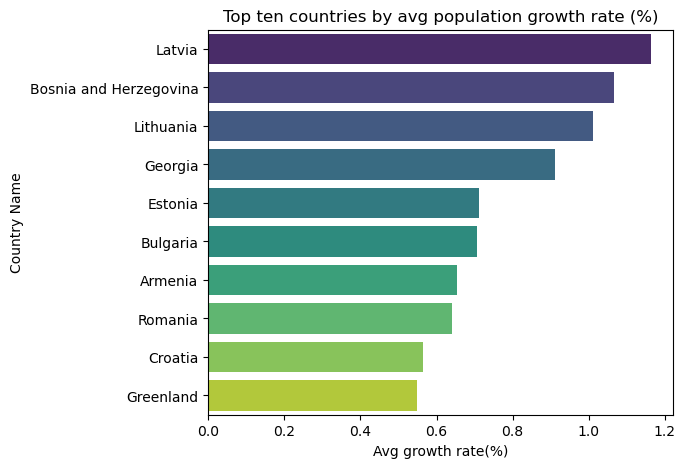

In [8]:
#top population growth countries
plt.figure(figsize=(6,5))
sns.barplot(data = top_population_growth, x = 'Population Growth YoY (%)', y = 'Country Name', palette= 'viridis' ).set(title='Top ten countries by avg population growth rate (%)', xlabel='Avg growth rate(%)', ylabel='Country Name')
plt.show()

In [9]:
top_population_growth.reset_index(drop = True).head(10)[['Country Name','Population Growth YoY (%)']]

,Country Name,Population Growth YoY (%)
0,Latvia,1.163381
1,Bosnia and Herzegovina,1.065317
2,Lithuania,1.011272
3,Georgia,0.912352
4,Estonia,0.710898
5,Bulgaria,0.707469
6,Armenia,0.652614
7,Romania,0.639861
8,Croatia,0.564585
9,Greenland,0.549451


C:\Users\HP\AppData\Local\Temp\ipykernel_12280\2224492116.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_gdp_growth, x =  'GDP Growth YoY (%)', y = 'Country Name', palette= 'cividis' ).set(title='Top ten countries by avearge gdp growth rate yoy(%)', xlabel='Avg GDP Growth Rate', ylabel='Country')


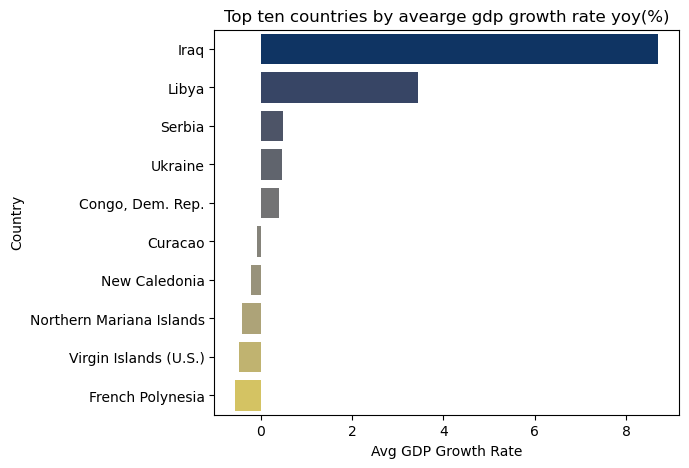

In [10]:
#top ten GDP growth countries
plt.figure(figsize=(6,5))
sns.barplot(data = top_gdp_growth, x =  'GDP Growth YoY (%)', y = 'Country Name', palette= 'cividis' ).set(title='Top ten countries by avearge gdp growth rate yoy(%)', xlabel='Avg GDP Growth Rate', ylabel='Country')
plt.show()

In [11]:
top_gdp_growth.reset_index(drop = True).head(10)

,Country Name,GDP Growth YoY (%)
0,Iraq,8.702965
1,Libya,3.447491
2,Serbia,0.483525
3,Ukraine,0.461531
4,"Congo, Dem. Rep.",0.398622
5,Curacao,-0.091866
6,New Caledonia,-0.223301
7,Northern Mariana Islands,-0.415696
8,Virgin Islands (U.S.),-0.483910
9,French Polynesia,-0.554728


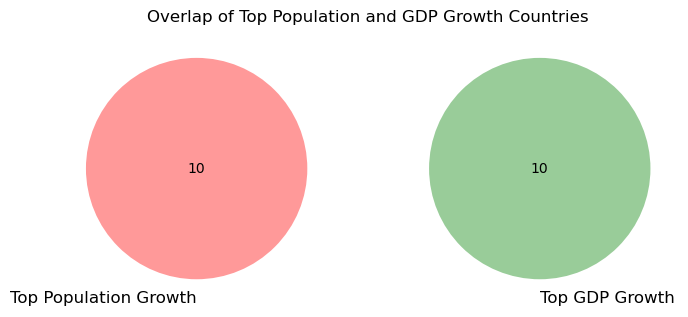

In [12]:
# Plot Venn Diagram for Overlap
plt.figure(figsize=(8, 8))
venn2(
    [set(top_population_growth['Country Name']), set(top_gdp_growth['Country Name'])],
    set_labels=('Top Population Growth', 'Top GDP Growth')
)
plt.title('Overlap of Top Population and GDP Growth Countries')
plt.show()


From our analysis, these are the top as per population growth are 

Latvia
Bosnia and Herzegovina
Lithuania
Georgia
Estonia
Bulgaria
Armenia
Romania
Croatia
Greenland

and the top countries as per GDP growth are 
Iraq
Libya
Serbia
Ukraine
Congo, Dem. Rep.
Curacao
New Caledonia
Northern Mariana Islands
Virgin Islands (U.S.)
French Polynesia

There are no overlaps

## Objective 2
**What regions saw the most growth in HDI in the 21st century?**

In [13]:
#filtering for 21st century
twenty_first_cent = hn[(hn['year'] == 2001) | (hn['year'] ==2021)]

In [14]:
#dropping all hdi_rank rows
rows_to_drop = twenty_first_cent[twenty_first_cent['rank'] == 'hdi_rank']
twenty_first_cent = twenty_first_cent.drop(rows_to_drop.index)

In [15]:
#getting the start year hdi
start_hdi = twenty_first_cent[(twenty_first_cent['year'] == 2001) & (twenty_first_cent['rank'] == 'hdi') ]

#end hdi
end_hdi = twenty_first_cent[(twenty_first_cent['year'] == 2021) & (twenty_first_cent['rank'] == 'hdi') ]

#start mean hdi
start_mean = start_hdi.groupby('region')['Value'].mean().reset_index(name = 'avg_hdi_start')

#end mean hdi
end_mean = end_hdi.groupby('region')['Value'].mean().reset_index(name = 'avg_hdi_end')

#merging both hdis
hdi_growth = pd.merge(start_mean,end_mean, on = 'region')

#getting the hdi growth
hdi_growth['growth'] = hdi_growth['avg_hdi_end'] - hdi_growth['avg_hdi_start']

#sorting by descending order
hdi_growth = hdi_growth.sort_values(by = 'growth', ascending = False)



In [16]:
growth_regions = hdi_growth[['region', 'growth']].reset_index(drop = True)
print(growth_regions)

  region    growth
0     SA  0.129839
1    SSA  0.102133
2   MENA  0.087500
3    ECA  0.076134
4    EAP  0.068267
5    LAC  0.066106
6     AS  0.060600
7    NAC  0.036500


In [17]:
growth_regions.sort_values(by='growth', inplace=True)
regions = growth_regions['region']
growth = growth_regions['growth']
growth

7    0.036500
6    0.060600
5    0.066106
4    0.068267
3    0.076134
2    0.087500
1    0.102133
0    0.129839
Name: growth, dtype: float64

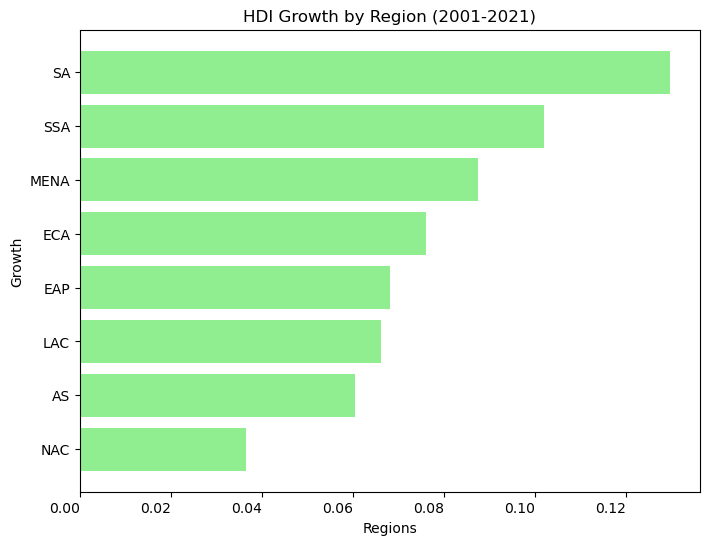

In [18]:
plt.figure(figsize=(8,6))

plt.barh(regions, growth, color='lightgreen')

plt.xlabel('Regions')
plt.ylabel('Growth')
plt.title('HDI Growth by Region (2001-2021)')

plt.xticks( ha='right')
plt.show()

The analysis revealed the following growth in HDI by region:

South Asia (SA): This region experienced the highest growth, with an HDI increase of 0.129839.
Sub-Saharan Africa (SSA): Following closely, SSA saw an HDI growth of 0.102133.
Middle East and North Africa (MENA): MENA had a growth of 0.087500.
Europe and Central Asia (ECA): ECA's HDI growth was 0.076134.
East Asia and the Pacific (EAP): This region saw an HDI increase of 0.068267.
Latin America and the Caribbean (LAC): LAC experienced a growth of 0.066106.
Arab States (AS): The growth in this region was 0.060600.
North America (NAC): NAC had the lowest growth among the regions, with an HDI increase of 0.036500.

### Objective 3
**Which factors are highly correlated with life expectancy?**

In [19]:
#correlation between birth rate and life expectancy
birth_rate = wb['birth rate per 1000 people']

life_expectancy = wb['Life expectancy at birth (years)']

correlation_l_b = birth_rate.corr(life_expectancy)

#correlation between death rate and life_Expectancy
death_rate = wb['death rate per 1000 people']
correlation_l_d = death_rate.corr(life_expectancy)

#correlation between power consumption and life expectancy
power_consumption = wb['power consumption per person(KWh)']
correlation_l_p = power_consumption.corr(life_expectancy)

#correlation between GDP (USD) and life expectancy
gdp = wb['GDP (USD)']
correlation_l_gdp = gdp.corr(life_expectancy)
#correlation between GDP per capita (USD) and life expectancy
gdp_per_capita = wb['GDP per capita (USD)']
correlation_l_gdp_c = gdp_per_capita.corr(life_expectancy)

#Individuals using the Internet (% of population)
internet_usage = wb['Individuals using the Internet (% of population)']
corr_l_int = internet_usage.corr(life_expectancy)

#Infant mortality rate (per 1,000 live births)
infant_mortality = wb['Infant mortality rate (per 1,000 live births)']
corr_l_im = infant_mortality.corr(life_expectancy)

#Population density (people per sq. km of land area)
population_density = wb['Population density (people per sq. km of land area)']
corr_l_pl = population_density.corr(life_expectancy)

#Unemployment (% of total labor force) (modeled ILO estimate)
unemployment = wb['Unemployment (% of total labor force) (modeled ILO estimate)']
correlation_l_unemp = unemployment.corr(life_expectancy)



In [20]:
#correlation between life expectancy and other numeric variables
correlations = {
    'Variables':[
        'birth_rat',
        'death_rate',
        'power_consumption',
        'gdp',
        'gdp_per_capita',
        'internet_usage',
        'infant_mortality',
        'population_density',
        'unemployment'
    ],
    'correlation':[
        correlation_l_b,
        correlation_l_d,
        correlation_l_p,
        correlation_l_gdp,
        correlation_l_gdp_c,
        corr_l_int,
        corr_l_im,
        corr_l_pl,
        correlation_l_unemp
    ]
}
#converting the correlations to data frame
correlations_ = pd.DataFrame(correlations)
print(correlations_)

            Variables  correlation
0           birth_rat    -0.853021
1          death_rate     0.009829
2   power_consumption     0.171808
3                 gdp     0.189505
4      gdp_per_capita     0.412690
5      internet_usage     0.355948
6    infant_mortality    -0.771438
7  population_density     0.134655
8        unemployment     0.220484


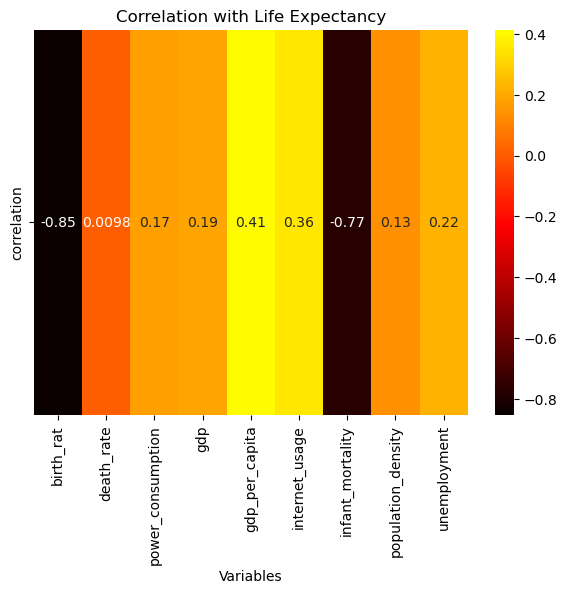

In [21]:
plt.figure(figsize=(7, 5))
sns.heatmap(correlations_.set_index('Variables').transpose(), annot=True, cmap='hot', center=0).set(title='Correlation with Life Expectancy')
plt.show()

This analysis investigates the correlations between various socio-economic factors and life expectancy. The key findings are as follows:

Birth Rate: There is a strong negative correlation (-0.853) with life expectancy, suggesting that higher birth rates are associated with lower life expectancy.
Death Rate: The correlation is near zero (0.010), indicating no significant relationship between death rate and life expectancy in the data.
Electric Power Consumption: A weak positive correlation (0.172) suggests that higher electric power consumption is slightly associated with higher life expectancy.
GDP (USD): There is a weak positive correlation (0.190) between total GDP and life expectancy, indicating that wealthier countries tend to have higher life expectancy.
GDP per Capita (USD): This has a moderate positive correlation (0.413) with life expectancy, meaning that countries with higher GDP per capita generally have higher life expectancy.
Internet Usage: The positive correlation (0.356) suggests that greater internet usage is associated with higher life expectancy.
Infant Mortality Rate: A strong negative correlation (-0.771) indicates that higher infant mortality rates are associated with lower life expectancy.
Population Density: A weak positive correlation (0.135) suggests that higher population density is slightly associated with higher life expectancy.
Unemployment: There is a weak positive correlation (0.220) between unemployment rates and life expectancy.

Conclusion:
There is a significant negative correlations with birth rate and infant mortality rate, suggesting that these factors are critical determinants of life expectancy. Economic indicators like GDP per capita and internet usage show moderate positive correlations, indicating their importance in improving life expectancy. Other factors like death rate, power consumption, population density, and unemployment show weaker correlations, suggesting a more complex relationship with life expectancy.

### **Objective 4
Which factors differentiate "High Income" vs "Low Income" Countries?**

In [22]:
# numeric columns
numeric_columns = ['birth rate per 1000 people', 
                   'death rate per 1000 people', 
                   'power consumption per person(KWh)', 
                   'GDP (USD)', 
                   'GDP per capita (USD)', 
                   'Individuals using the Internet (% of population)', 
                   'Infant mortality rate (per 1,000 live births)', 
                   'Life expectancy at birth (years)', 
                   'Population density (people per sq. km of land area)', 
                   'Unemployment (% of total labor force) (modeled ILO estimate)']

# Converting the  numeric columns to proper numeric types
for col in numeric_columns:
    wb[col] = pd.to_numeric(wb[col], errors='coerce')

    
# Grouping the incomegroup and getting the mean for each numeric variables
grouped = wb.groupby('IncomeGroup')[numeric_columns].mean().reset_index()






In [23]:
grouped.head()

,IncomeGroup,birth rate per 1000 people,death rate per 1000 people,power consumption per person(KWh),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
0,High income: OECD,14.469246,7.234674,2136.726355,7.279190e+11,18420.011907,32.497070,10.736277,74.957565,124.003735,3.809983
1,High income: nonOECD,20.122600,7.237589,1964.200747,5.159158e+10,13691.756629,26.043382,12.074623,70.202195,1080.432670,2.360588
2,Low income,43.463820,7.359948,1322.121555,4.651242e+09,636.386849,5.476688,96.013445,49.739048,73.929862,2.051177
3,Lower middle income,34.846874,7.253815,1405.402914,4.295138e+10,1219.793930,8.210882,63.622877,59.793330,94.843426,3.980319
4,Upper middle income,27.559082,7.137854,1647.560844,1.183926e+11,2967.190432,12.745997,34.757119,66.364878,102.919849,5.005712


To understand what factors differentiate high income countries and low income countries, i calculated the mean of each income group. The summary of the analysis is explained below

Birth Rate and Death Rate:

The birth rate per 1000 people is highest in "Low income" countries (43.46) and lowest in "High income: OECD" countries (14.47).
The death rate per 1000 people shows less variation across income groups, with slight differences observed.
Economic Indicators (GDP, GDP per Capita):

"High income: OECD" and "High income: nonOECD" countries have significantly higher GDP values compared to "Low income," "Lower middle income," and "Upper middle income" countries. Similarly, GDP per capita is highest in "High income: OECD" countries and lowest in "Low income" countries, indicating higher economic prosperity. Infrastructure and Technology (Power Consumption, Internet Usage):

"High income: OECD" countries have higher power consumption per person and a higher percentage of individuals using the internet compared to other income groups. Health Indicators (Infant Mortality, Life Expectancy):

Infant mortality rate is highest in "Low income" countries and lowest in "High income: OECD" countries, reflecting disparities in healthcare access and quality. Life expectancy at birth is highest in "High income: OECD" countries, indicating better healthcare systems and overall quality of life. Population Density and Unemployment:

Population density is relatively higher in "Lower middle income" and "Upper middle income" countries compared to "High income" and "Low income" countries. Unemployment rates are generally lower in "High income" countries compared to "Low income" and "Middle income" countries.

Summary:

There are significant disparities in various socio-economic indicators between different income groups. "High income" countries generally exhibit higher economic prosperity, better infrastructure, improved healthcare systems, and lower unemployment rates compared to "Low income" and "Middle income" countries.

The major differentiators between high-income and low-income countries include:

Economic Strength: Higher GDP and GDP per capita in high-income countries. Healthcare and Life Expectancy: Lower infant mortality rates and higher life expectancy in high-income countries. Technological Access: Greater internet usage in high-income countries.
Birth Rates: Lower birth rates in high-income countries, indicating different demographic trends. These differences highlight the disparities in economic development, access to resources, healthcare, and technological infrastructure between high-income and low-income countries.

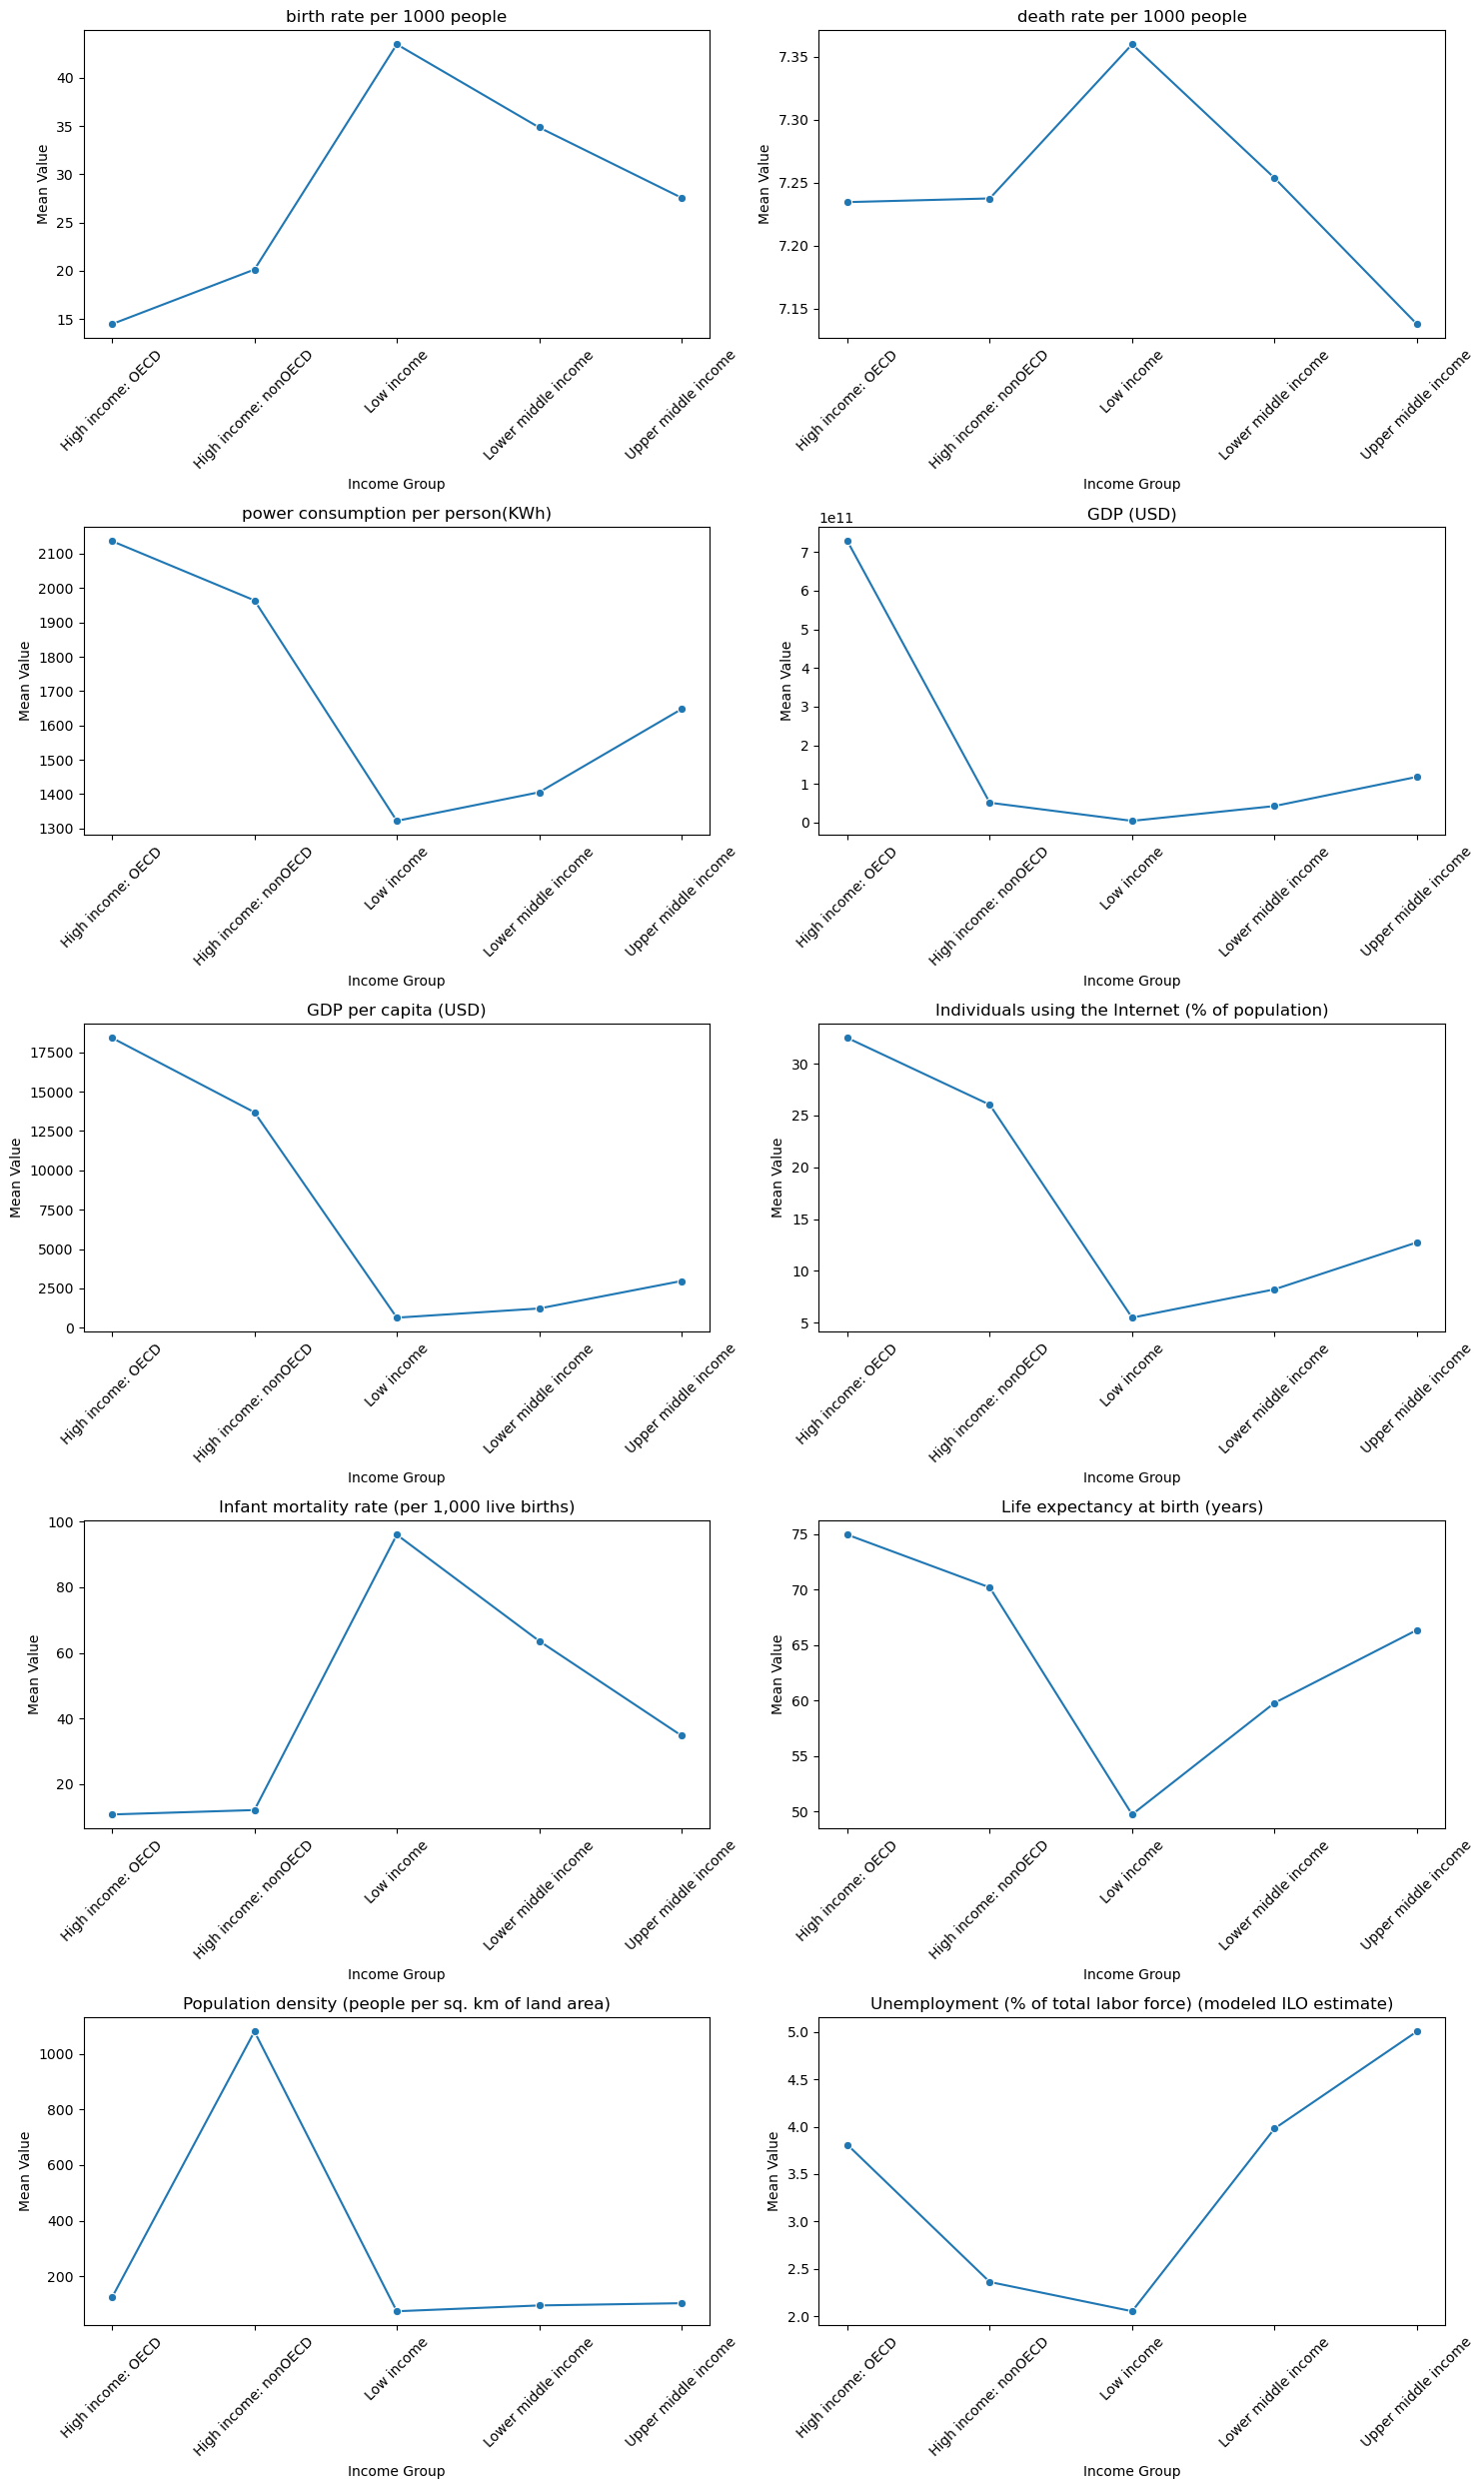

In [24]:
# Line plot for each numeric column
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))

for i, column in enumerate(numeric_columns):
    sns.lineplot(x='IncomeGroup', y=column, data=grouped, marker='o', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(column)
    axes[i//2, i%2].set_xlabel('Income Group')
    axes[i//2, i%2].set_ylabel('Mean Value')
    axes[i//2, i%2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
